Load libraries

In [402]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data set

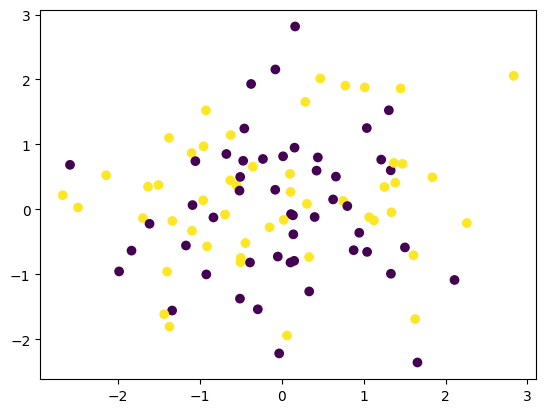

In [403]:
X, y = make_classification(n_classes=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1],c=y)

Model

In [404]:
class NaiveBayes:
    def fit(self, X, y):
        numberOfSamples, numberOfFeatures = X.shape
        self.distinctClasses = np.unique(y)
        numberOfClasses = len(self.distinctClasses)

        self._mean = np.zeros((numberOfClasses,numberOfFeatures), dtype=np.float64)
        self._var = np.zeros((numberOfClasses, numberOfFeatures), dtype=np.float64)
        self._prior = np.zeros((numberOfClasses), dtype=np.float64)

        # calculate mean, variance and prior for each class
        for idx, classToBeCompared in enumerate(self.distinctClasses):
            XWithGivenClass = X[y == classToBeCompared]
            self._mean[idx,:] = XWithGivenClass.mean(axis=0)
            self._var[idx,:] = XWithGivenClass.var(axis=0)
            self._prior[idx] = XWithGivenClass.shape[0] / float(numberOfSamples)
    
    def gaussianDistribution(self,mean,variance,x):
        return (1/np.sqrt(2*np.pi*(variance**2))) * np.exp(-1 * ((x - mean) ** 2) / (2*(variance**2)))


    def _predict(self, x):
        posteriors = []

        for idx in self.distinctClasses:
            prior = np.log(self._prior[idx])
            posterior = np.sum(np.log(self.gaussianDistribution(self._mean[idx], self._var[idx], x)))
            posteriors.append(posterior + prior)

        return self.distinctClasses[np.argmax(posteriors)]

    def predict(self, X):
        yPredicted = [self._predict(x) for x in X]
        return np.array(yPredicted)


Train

In [405]:
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2,random_state=1234)

naiveBayes = NaiveBayes()
naiveBayes.fit(XTrain, yTrain)
yPredicted = naiveBayes.predict(XTest)

Evaluation

In [406]:

print(f"Accuracy: {accuracy_score(y_true=yTest, y_pred=yPredicted)*100}%")

Accuracy: 85.0%
